In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df = pd.read_csv('./datasets/mental-health.csv')

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1053 non-null   int64  
 1   Gender                        1052 non-null   object 
 2   Sleep Time                    1049 non-null   float64
 3   Stress Level                  1045 non-null   float64
 4   exercise frequency            1048 non-null   float64
 5   social interaction frequency  1045 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 49.5+ KB


In [252]:
df.head()

,Age,Gender,Sleep Time,Stress Level,exercise frequency,social interaction frequency
0,23,Female,6.0,6.0,3.0,4.0
1,23,Male,7.0,7.0,1.0,3.0
2,20,Female,6.0,1.0,0.0,4.0
3,20,Male,3.0,7.0,3.0,4.0
4,23,Female,6.0,8.0,0.0,3.0


Setting Mental Health Status Feature

In [253]:
def set_mental_health_status(row):
    if row['Sleep Time']>7 and row['exercise frequency']>3 and row['social interaction frequency'] >=3:
        return 'Good'
    elif 5<=row['Sleep Time']<=7 and 1<=row['exercise frequency']<=3 or row['social interaction frequency'] ==2:
        return 'Fair'
    else:
        return 'Poor'

In [254]:
df['mental_health_status'] = df.apply(set_mental_health_status, axis=1)

In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1053.0,27.862298,7.826969,18.0,24.0,25.0,28.0,70.0
Sleep Time,1049.0,6.511725,1.287701,2.0,6.0,6.0,7.0,10.0
Stress Level,1045.0,5.928230,2.124843,1.0,4.0,6.0,8.0,10.0
exercise frequency,1048.0,1.938931,1.408153,0.0,1.0,2.0,3.0,7.0
social interaction frequency,1045.0,2.856459,1.654689,0.0,2.0,3.0,4.0,10.0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1053 non-null   int64  
 1   Gender                        1052 non-null   object 
 2   Sleep Time                    1049 non-null   float64
 3   Stress Level                  1045 non-null   float64
 4   exercise frequency            1048 non-null   float64
 5   social interaction frequency  1045 non-null   float64
 6   mental_health_status          1053 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 57.7+ KB


In [257]:
df.to_csv('mental_health_cleaned.csv', index=False)

### Univariate Analysis

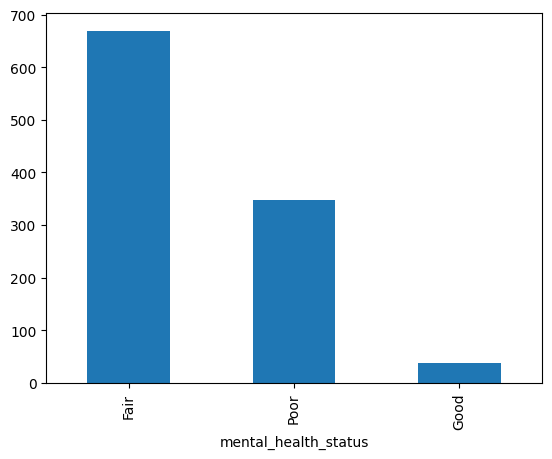

In [ ]:
df['mental_health_status'].value_counts().plot(kind='pie')
plt.show()

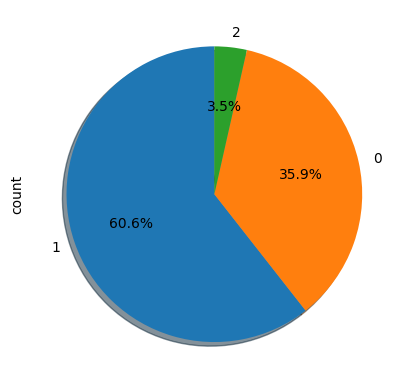

In [242]:
df['mental_health_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

***Insights: majority of the respondents have a decent or stable mental health***

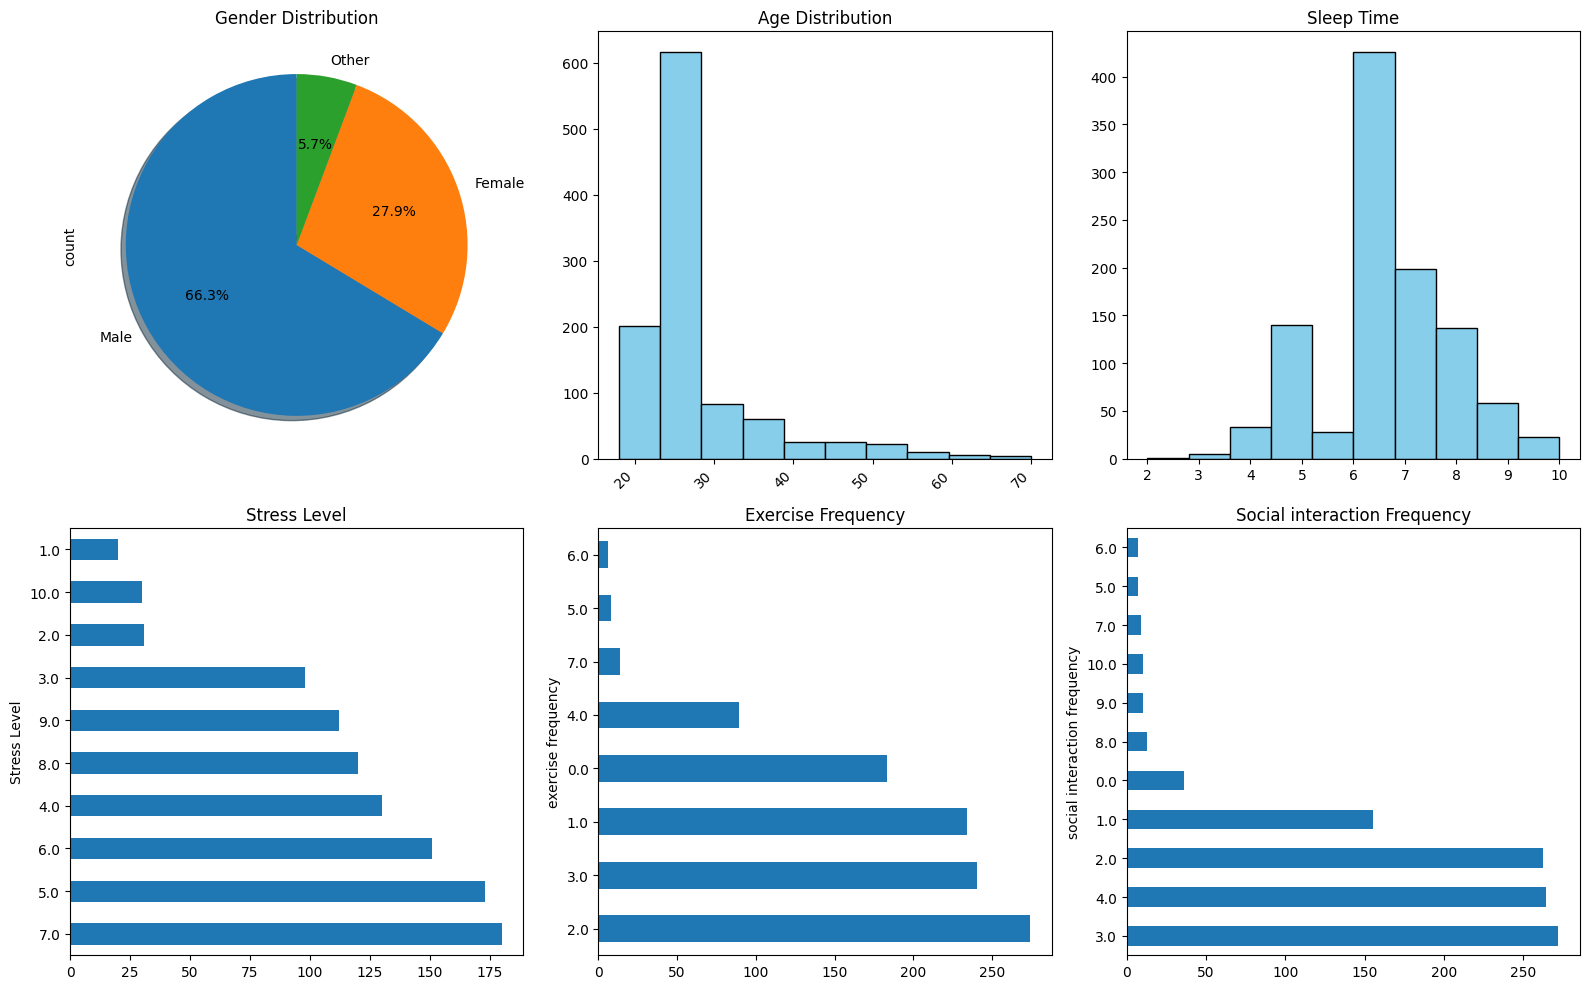

In [203]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Gender Distribution')

# Age Distribution
plt.subplot(2, 3, 2)
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xticks(rotation=45, ha='right')

# Sleep Time Distribution
plt.subplot(2, 3, 3)
plt.hist(df['Sleep Time'], bins=10, color='skyblue', edgecolor='black')
plt.title('Sleep Time')

# Stress Level Distribution
plt.subplot(2, 3, 4)
df['Stress Level'].value_counts().plot(kind='barh')
plt.title('Stress Level')

# Exercise Frequency Distribution
plt.subplot(2, 3, 5)
df['exercise frequency'].value_counts().plot(kind='barh')
plt.title('Exercise Frequency')

# Social Interaction Distribution
plt.subplot(2, 3, 6)
df['social interaction frequency'].value_counts().plot(kind='barh')
plt.title('Social interaction Frequency')

plt.tight_layout()
plt.show()

Insights:
1. **Gender Distribution**: The dataset is imbalanced, with **66.3% male** participants and only **5.7% other**.
2. **Age Distribution**: Most participants are concentrated around the **25–27 age group**.
3. **Sleep Time**: The majority of participants sleep around **6 hours per night**.
4. **Stress Level**: Stress levels vary widely, with a notable concentration at **higher stress levels (6–8)**.
5. **Exercise Frequency**: A large number of participants **rarely or never exercise**.
6. **Social Interaction Frequency**: Social interaction occurs **occasionally to frequently**, with fewer participants reporting minimal interaction.*

### Bivariate Analysis

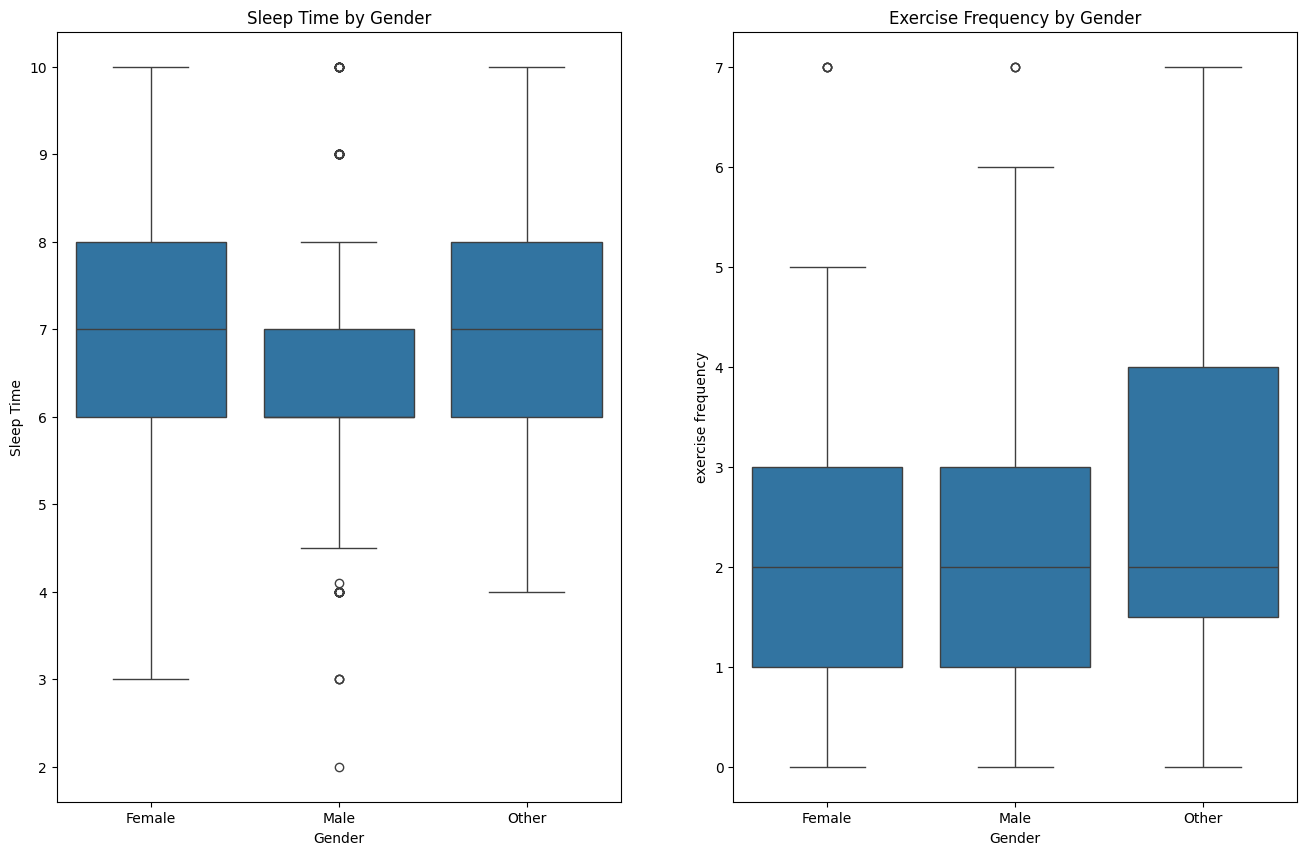

In [204]:
#mental health status grouped by gender - boxplot
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Sleep Time', data=df)
plt.title("Sleep Time by Gender")
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='exercise frequency', data=df)
plt.title("Exercise Frequency by Gender")
plt.show()

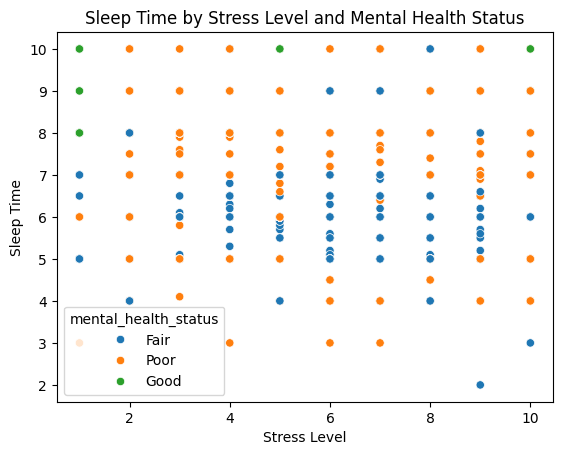

In [205]:
#sleep time by stress level scatter plot, mental health status differentiated

sns.scatterplot(x='Stress Level', y='Sleep Time', hue='mental_health_status', data=df)
plt.title("Sleep Time by Stress Level and Mental Health Status")
plt.show()

No pattern found

C:\Users\BJIT\AppData\Local\Temp\ipykernel_11224\2224478335.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health_status', y='Sleep Time', data=df, palette="coolwarm")
C:\Users\BJIT\AppData\Local\Temp\ipykernel_11224\2224478335.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health_status', y='Stress Level', data=df, palette="viridis")
C:\Users\BJIT\AppData\Local\Temp\ipykernel_11224\2224478335.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health_status', y='exercise frequency', data=df, palette

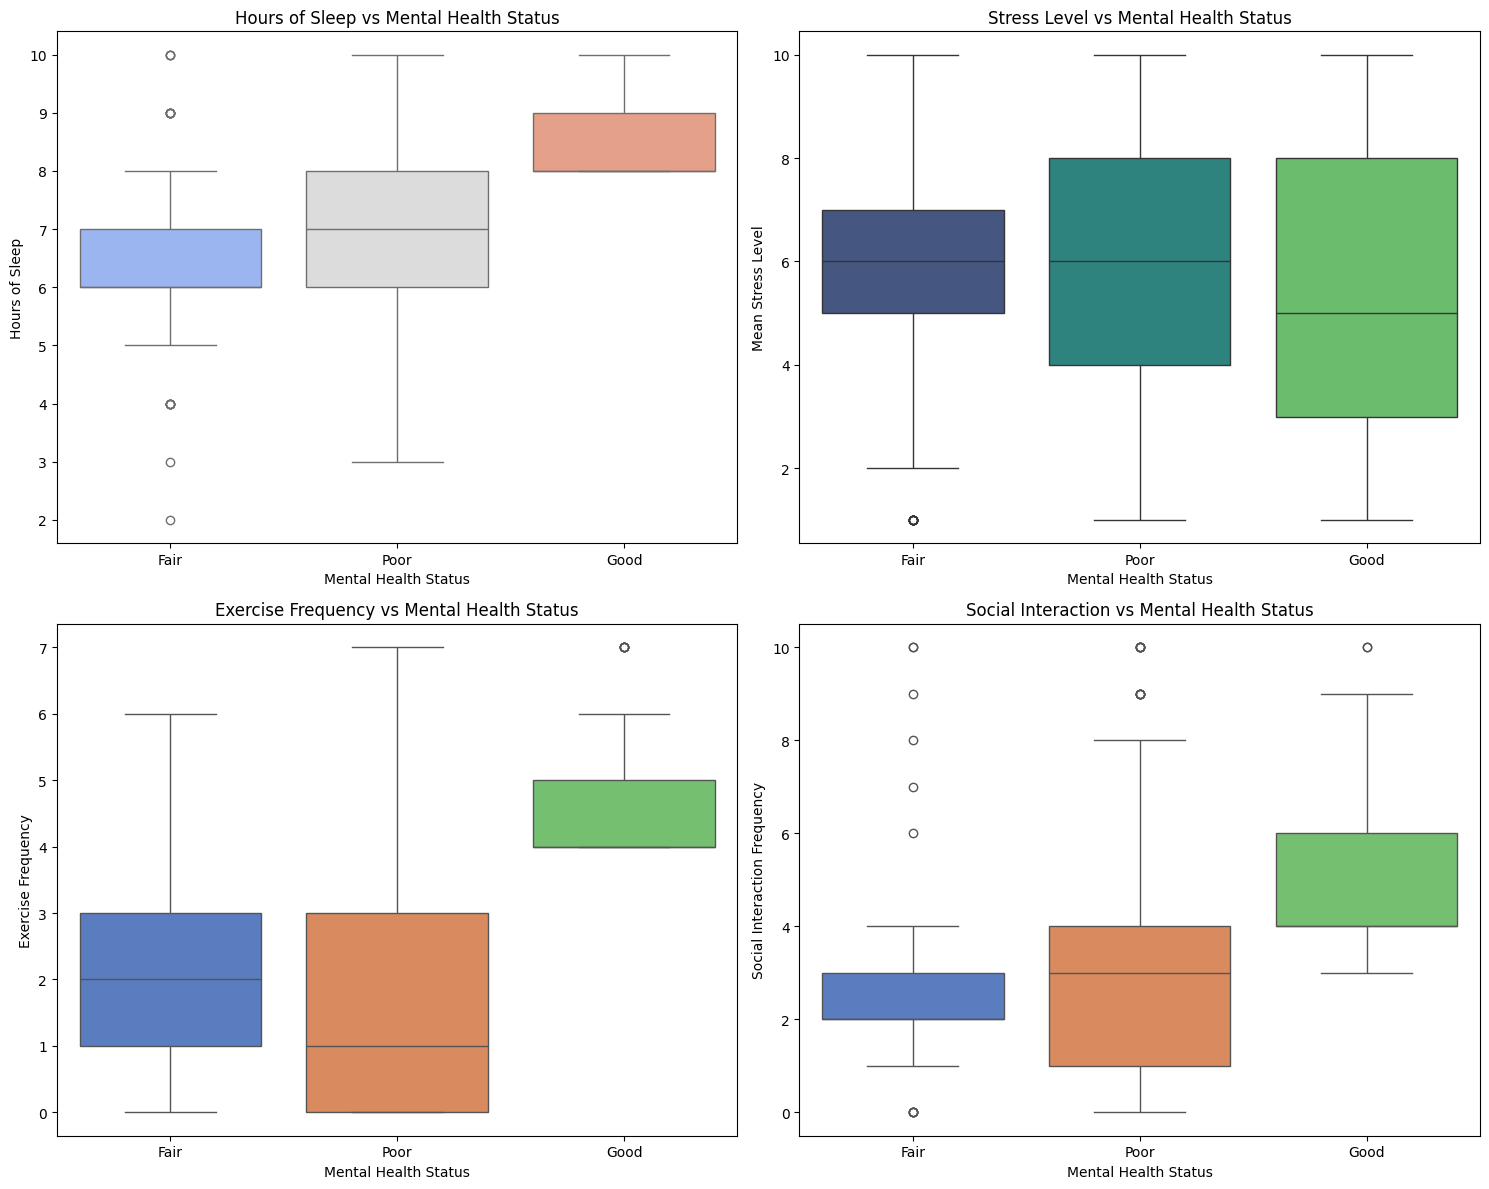

In [206]:
plt.figure(figsize=(15, 12))

# 1. Hours of Sleep vs. Mental Health Status - Box Plot
plt.subplot(2, 2, 1)
sns.boxplot(x='mental_health_status', y='Sleep Time', data=df, palette="coolwarm")
plt.title("Hours of Sleep vs Mental Health Status")
plt.ylabel("Hours of Sleep")
plt.xlabel("Mental Health Status")

# 2. Stress Level vs. Mental Health Status - Bar Plot
plt.subplot(2, 2, 2)
sns.boxplot(x='mental_health_status', y='Stress Level', data=df, palette="viridis")
plt.title("Stress Level vs Mental Health Status")
plt.ylabel("Mean Stress Level")
plt.xlabel("Mental Health Status")

# 3. Exercise Frequency vs. Mental Health Status - Bar Plot
plt.subplot(2, 2, 3)
sns.boxplot(x='mental_health_status', y='exercise frequency', data=df, palette="muted")
plt.title("Exercise Frequency vs Mental Health Status")
plt.ylabel("Exercise Frequency")
plt.xlabel("Mental Health Status")

# 4. Social Interaction vs. Mental Health Status - Stacked Bar Plot
plt.subplot(2, 2, 4)
sns.boxplot(x='mental_health_status', y='social interaction frequency', data=df, palette="muted")
plt.title("Social Interaction vs Mental Health Status")
plt.ylabel("Social Interaction Frequency")
plt.xlabel("Mental Health Status")

# Display the plots
plt.tight_layout()
plt.show()

Insights
1. Hours of Sleep vs. Mental Health Status: Students with 'Poor' mental health tend to have slightly lower sleep hours compared to 'Fair' status.
2. Stress Level vs. Mental Health Status: 'Poor' mental health is associated with higher stress levels.
3. Exercise Frequency vs. Mental Health Status: Students with 'Fair' mental health exercise more frequently than those with 'Poor' mental health.
4. Social Interaction vs. Mental Health Status: Students with 'Fair' mental health have lower social interaction compared to 'Poor', where interaction frequency is higher.

In [207]:
num_values = ['Age', 'Stress Level', 'Sleep Time', 'exercise frequency', 'social interaction frequency']
correlation = df[num_values].corr()

In [208]:
correlation['Sleep Time']

Age                             0.080677
Stress Level                   -0.118514
Sleep Time                      1.000000
exercise frequency              0.114384
social interaction frequency    0.108295
Name: Sleep Time, dtype: float64

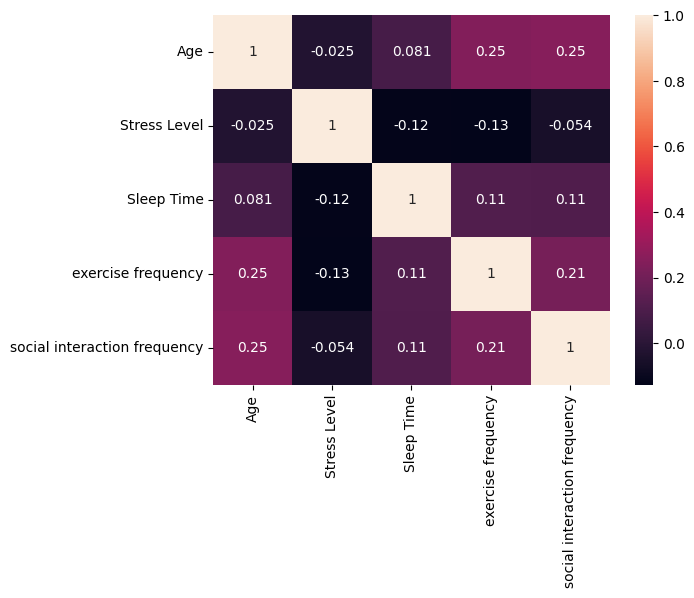

In [209]:
sns.heatmap(correlation, annot=True)
plt.show()

No discernible correlation

### SUMMARY

The dataset contains students aged between 23-27 (average age 25) who sleep 6 hours on avg, have mid-high stress level and moderate social. Majority of the respondents have a decent or stable mental health. High stress level, less sleep time and less social interactions correspond to poor mental health.

# Classification Analysis

Removing Nulls and Duplicates

In [210]:
df.isnull().sum()

Age                             0
Gender                          1
Sleep Time                      4
Stress Level                    8
exercise frequency              5
social interaction frequency    8
mental_health_status            0
dtype: int64

In [211]:
df.duplicated().sum()

np.int64(173)

In [212]:
df.dropna(inplace=True)

In [213]:
df.duplicated().sum()

np.int64(173)

In [214]:
df.drop_duplicates(inplace=True)

In [215]:
mhs_map = {'Poor': 0, 'Fair': 1, 'Good': 2}

df['mental_health_status'] = df['mental_health_status'].map(mhs_map)
df.head()

,Age,Gender,Sleep Time,Stress Level,exercise frequency,social interaction frequency,mental_health_status
0,23,Female,6.0,6.0,3.0,4.0,1
1,23,Male,7.0,7.0,1.0,3.0,1
2,20,Female,6.0,1.0,0.0,4.0,0
3,20,Male,3.0,7.0,3.0,4.0,0
4,23,Female,6.0,8.0,0.0,3.0,0


*Removing Outliers*

In [216]:
# remove numerical values using IQR method
def remove_outlier(column_name, df=df):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [217]:
df = remove_outlier('Age')
df = remove_outlier('Sleep Time')
df = remove_outlier('Stress Level')
df = remove_outlier('exercise frequency')
df = remove_outlier('social interaction frequency')

In [218]:
df = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = ['Gender'],
               drop_first =True,
              dtype='int8')

In [219]:
df.shape

(822, 8)

In [220]:
df.head()

,Age,Sleep Time,Stress Level,exercise frequency,social interaction frequency,mental_health_status,OHE_Male,OHE_Other
0,23,6.0,6.0,3.0,4.0,1,0,0
1,23,7.0,7.0,1.0,3.0,1,1,0
2,20,6.0,1.0,0.0,4.0,0,0,0
3,20,3.0,7.0,3.0,4.0,0,1,0
4,23,6.0,8.0,0.0,3.0,0,0,0


In [221]:
X = df.drop('mental_health_status', axis=1)
Y = df['mental_health_status']

In [222]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=23)

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [224]:
df['mental_health_status'].value_counts()

mental_health_status
1    498
0    295
2     29
Name: count, dtype: int64

*Logistic Regression*

In [225]:
lr = LogisticRegression(random_state=20)
lr.fit(X_train, y_train)

d:\Audwit_Anam_YSD_Repo\YSD_B4_AI_Audwit\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=20)

In [226]:
lr_predictions = lr.predict(X_test)

In [227]:
print(lr_predictions)

[1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 2 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 0 0 0 1 1 2 1 1 1 0 1 1 0 1 2 0 1 1 1 1]


In [228]:
lr.score(X_test, y_test)

0.6842105263157895

In [229]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.56      0.42      0.48        86
           1       0.73      0.86      0.79       152
           2       0.67      0.22      0.33         9

    accuracy                           0.68       247
   macro avg       0.65      0.50      0.53       247
weighted avg       0.67      0.68      0.66       247



In [230]:
def showConfusionMatrix(y_test, predictions, title):
    cm = confusion_matrix(y_test, predictions)
    # plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # plt.show()

Confusion Matrix

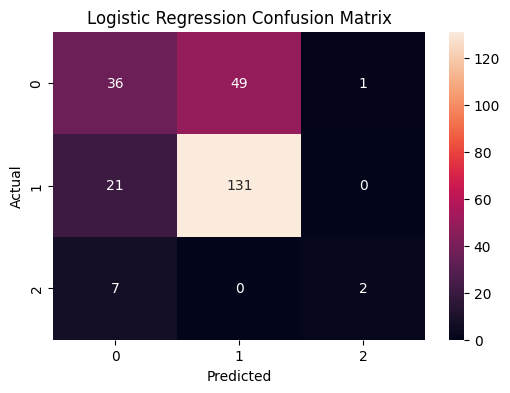

In [231]:
plt.figure(figsize = (6, 4))
showConfusionMatrix(y_test, lr_predictions, "Logistic Regression Confusion Matrix")
plt.show()

### *SVM*

Trying the SVM model with different kernels:
* Linear
* Radial Basis Function (RBF)
* Sigmoid

In [247]:
def performSVMclassification(kernel):
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_test, y_test)
    svm_predictions = svm.predict(X_test)
    print(f"Predictions: {svm_predictions}")
    print(f"Classification Report:\n {classification_report(y_test, svm_predictions)}")
    return svm_predictions

*Linear Kernel*

In [248]:
linear_svm_predictions = performSVMclassification('linear')

Predictions: [1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 2 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 2 1 1 1 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 1 2 1 1 1 0 1 1 0 0 1 0 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.38      0.51        86
           1       0.73      0.94      0.82       152
           2       1.00      0.89      0.94         9

    accuracy                           0.74       247
   macro avg       0.83      0.74      0.76       247
weighted avg       0.75      0.74      0.72       247



In [234]:
linear_svm_predictions

array([1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1])

*RBF Kernel*

In [235]:
rbf_svm_predictions = performSVMclassification('rbf')

Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.62      1.00      0.76       152
           2       0.00      0.00      0.00         9

    accuracy                           0.62       247
   macro avg       0.21      0.33      0.25       247
weighted avg       0.38      0.62      0.47       247



d:\Audwit_Anam_YSD_Repo\YSD_B4_AI_Audwit\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Audwit_Anam_YSD_Repo\YSD_B4_AI_Audwit\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Audwit_Anam_YSD_Repo\YSD_B4_AI_Audwit\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

*Sigmoid Kernel*

In [236]:
sigmoid_svm_predictions = performSVMclassification('sigmoid')

Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.09        86
           1       0.63      1.00      0.77       152
           2       0.00      0.00      0.00         9

    accuracy                           0.63       247
   macro avg       0.54      0.35      0.29       247
weighted avg       0.73      0.63      0.50       247



d:\Audwit_Anam_YSD_Repo\YSD_B4_AI_Audwit\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Audwit_Anam_YSD_Repo\YSD_B4_AI_Audwit\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Audwit_Anam_YSD_Repo\YSD_B4_AI_Audwit\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Confusion Matrix

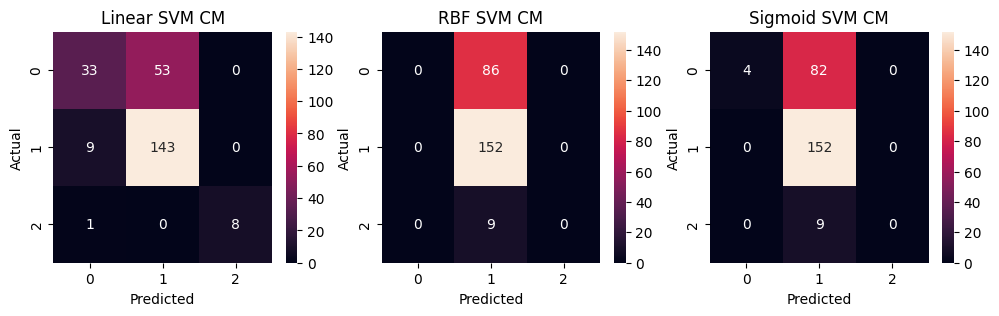

In [237]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
showConfusionMatrix(y_test, linear_svm_predictions, "Linear SVM CM")
plt.subplot(1, 3, 2)
showConfusionMatrix(y_test, rbf_svm_predictions, "RBF SVM CM")
plt.subplot(1, 3, 3)
showConfusionMatrix(y_test, sigmoid_svm_predictions, "Sigmoid SVM CM")
plt.show()

With complex kernels the SVM model fails to predict the classes 1 (Fair) and 2 (Good).

### *Random Forest*

In [238]:
#number of trees is 100
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) 

In [239]:
random_forest.fit(X_test, y_test)
rf_predictions = random_forest.predict(X_test)
print(f"Predictions: {rf_predictions}")
print(f"Classification Report:\n {classification_report(y_test, rf_predictions)}")

Predictions: [1 1 0 1 1 2 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1
 2 0 0 0 1 0 1 1 0 1 1 2 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 2 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 2 1 1 0 1 1 0
 1 1 1 0 0 1 1 1 1 1 1 2 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 2 0 1 1 1 0 0 1 0
 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 2 1 1 0 0 1
 0 1 1 1 0 0 1 0 1 1 2 1 1 1 0 1 1 1 0 0 0 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00         9

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



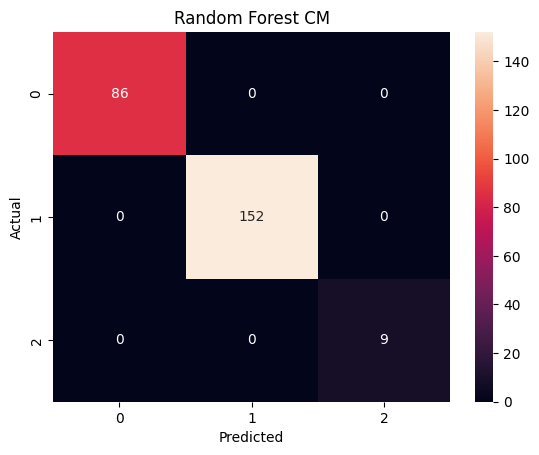

In [240]:
showConfusionMatrix(y_test, rf_predictions, "Random Forest CM")
plt.show()

### Summary

The mental health dataset has a target column 'mental_health_status' and a number of features related to the lifestyle and general information about the respondentsl. The target label is generated based on predefined conditions on these features.

I used 3 models to classify this dataset:
* Logistic regression
* SVM using 3 different kernels: linear, rbf, and sigmoid
* Random forest (number of trees = 100)

***Data Preprocessing***

At first I one-hot encoded the 'Gender' feature and label encoded the target 'mental_health_status' feature.

Then I performed label-feature split and train-test split maintaining 70-30 ratio. In the training set, the distribution of class is as follows:
* Fair  -  16
* Poor  -  14
* Good  -   6

and in test set it is as follows:

mental_health_status
* Fair  -  3
* Poor  -  7
* Good  -  1

I will discuss the classification performance of each model in the following sections.

***Logistic Regression***

The logistic regression is the simplest classification model that applies an activation function on top of the output of the linear regression output to map it to a value in the range [0, 1]. Then based on a threshold value, the model classifies the every test sample as 'Poor', 'Fair' and 'Good'.

My LR model achieved an accuracy of `63.64%`. For 'Poor' there are no false positives as `precision is 1`, but low recall means many samples are not being labeled as positive. For 'Fair' and 'Good' there are no false negatives as `recall is 1`. The model tends to over-predict classes 'Fair' and 'Good' (high recall but low precision).

***SVM***

The SVM model `performed best` with the `linear kernel`. This implies that the data is `linearly separable`, meaning a straight line (or hyperplane in higher dimensions) can effectively separate the classes and the `features are linearly correlated with target label`.

The other more `complex kernels (rbf and sigmoid)` are better at capturing `non-linear relationships`. But they can't recognize linear patterns well, and hence `overfit a complex decision boundary` with the training data, hence performing poorly on test set. They `completely fail to classify` the `'Fair' and 'Good' classes`, likely because of `low balance in test set`.

***Random Forest***

Random forest is an ensemble model that combines the decision of multiple decision trees and averages the best results. I took 100 decision trees, and achieved a `perfect score of 100%` (accuracy, precision, recall, f1). The model perfectly captures the relationship of the features with the target label. The reason behind is likely the fact that the target variable is generated based on conditions imposed on the features themselves, so the model just `recognizes that condition or pattern`, and performs perfectly.